A préparer dans votre environnement habituel (notebook ?)   
Vous commencez à travailler seuls sur les données (mais à partir de demain matin groupe de 5)   

But 1 = Comprendre les données (variables, valeurs...) et le besoin.   
Pourquoi le client a-t-il besoin de moi ? De quoi parlent ses données ?  

But 2 = Feature engineering (cleaner ? modifier des colonnes ? nouvelles variables ?). Il faut s'approprier la base

But 3 = Se représenter les données : faire des viz pour mieux comprendre. Utiliser seaborn  

In [381]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Import dataset avec exclusion header & footer

In [382]:
df = pd.read_excel('DATABASE.xls', index_col=0, skiprows=[0,1,2], skipfooter=42)  

## Renommage colonnes

In [383]:
# list(df.columns)

In [384]:
df = df.rename(columns={'Sender c': 'Sender1', 
                        'Sender 2c': 'Sender2', 
                        'Sender 3c': 'Sender3', 
                        'Targetd': 'Target',
                        'US casee': 'US_case', 
                        'US unilateral casef': 'US_unilateral_case', 
                        'Foreign policy goal categoryg': 'Goal_categ', 
                        'First yearh': 'First_year',
                        'Last yeari': 'Last_year', 
                        'Policy resultj': 'Policy_result', 
                        'Sanctions contributionk': 'Sanctions_contrib',
                        'Success \nscorel': 'Success_score', 
                        'Companion policiesm': 'Comp_policies', 
                        'International cooperationn':'Int_coop', 
                        'International assistanceo': 'Int_assistance', 
                        'Cooperating international organizationp': 'Coop_int_org',
                        'International organization senderq': 'Int_org_sender', 
                        'International organization sender & target membersr': 'Int_org_sender_&_target_members', 
                        'Length (years)s': 'Length_years',
                        'Prior relationst': 'Prior_relations', 
                        'Regime Type \n(DEMOC 1st year)u': 'Regime_type', 
                        'Regime Type2 (Polity2 1st year)v': 'Regime_type2', 
                        'Regime Type3 \n(Scale 1st year)w': 'Regime_type3',
                        'Political stability priorx': 'Political_stability_prior', 
                        'Political stability duringy': 'Political_stability_during',
                        'Cost to targetz': 'Cost_to_target', 
                        'Cost to target (percent of GNP)aa': 'Cost_to_target_%GNP)',
                        'Cost to target per capitabb': 'Cost_to_target_per_capita', 
                        'Trade linkagecc': 'Trade_linkage', 
                        'GNP \nratiodd': 'GNP_ratio',
                        'Health and stabilityee': 'Health_&_stability', 
                        'Sanction typeff': 'Sanction_type', 
                        'Cost to sendergg': 'Cost_to_sender',
                        'GDP growth (percent, 5-year average)hh': 'GDP_growth%5years_average', 
                        'Inflation (percent,\n 3-year average)ii':'Inflation%3years_average', 
                        'Target International Monetary Fund codejj': 'Target_int_monetary_code', 
                        'Country groupkk': 'Country_group'
                       })

In [385]:
df.index.names = ['id_case']

In [386]:
df.head()

,Sender1,Sender2,Sender3,Target,Goal,US_case,US_unilateral_case,Goal_categ,First_year,Last_year,Policy_result,Sanctions_contrib,Success_score,Comp_policies,Int_coop,Int_assistance,Coop_int_org,Int_org_sender,Int_org_sender_&_target_members,Length_years,Prior_relations,Regime_type,Regime_type2,Regime_type3,Political_stability_prior,Political_stability_during,Cost_to_target,Cost_to_target_%GNP),Cost_to_target_per_capita,Trade_linkage,GNP_ratio,Health_&_stability,Sanction_type,Cost_to_sender,GDP_growth%5years_average,Inflation%3years_average,Target_int_monetary_code,Country_group
id_case,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14-1,UNITED KINGDOM,NaN,NaN,GERMANY,Military victory,0,0,4,1914,1918,4,3,12,R,4,A,--,0,0,4,1,5,2,2,0,0,843,7.1,12.58,9,1.0,3,"F,X,M",4,3.58,2.86667,134,1
17-1,UNITED STATES,NaN,NaN,JAPAN,Shipping for Allies,1,1,5,1917,1918,2,2,4,--,1,--,--,0,0,1,2,5,1,2,0,0,23,0.8,0.44,20.5,13.0,3,X,2,5.4,25.6,158,1
18-1,UNITED KINGDOM,NaN,NaN,RUSSIA,Destabilize Bolsheviks,0,0,2,1918,1920,1,2,2,"R,Q",4,--,--,0,0,2,1,1,-1,2,0.1,0,446,4.1,2.49,18.5,1.0,1,"F,X,M",3,n.a.,n.a.,922,2
21-1,LEAGUE OF NATIONS,NaN,NaN,YUGOSLAVIA,Military disruption vs. Albania,0,0,3,1921,1921,4,4,16,--,4,--,--,1,1,1,2,3,0,2,0.4,0,--,--,--,26.5,37.0,2,--,2,-1.5,n.a.,188,2
25-1,LEAGUE OF NATIONS,NaN,NaN,GREECE,Withdraw from Bulgaria,0,0,3,1925,1925,4,4,16,--,4,--,--,1,1,1,2,0,-6,1,0.9,0,--,--,--,36,56.0,2,--,2,3.3,48.8,174,1


## Shape & dtypes

In [387]:
print('shape = ', df.shape)

shape =  (204, 38)


In [388]:
df.dtypes

Sender1                             object
Sender2                             object
Sender3                             object
Target                              object
Goal                                object
US_case                              int64
US_unilateral_case                   int64
Goal_categ                           int64
First_year                           int64
Last_year                           object
Policy_result                        int64
Sanctions_contrib                    int64
Success_score                        int64
Comp_policies                       object
Int_coop                             int64
Int_assistance                      object
Coop_int_org                        object
Int_org_sender                       int64
Int_org_sender_&_target_members      int64
Length_years                         int64
Prior_relations                      int64
Regime_type                         object
Regime_type2                        object
Regime_type

## Valeurs manquantes

In [389]:
df.isna().sum()  

Sender1                              0
Sender2                            145
Sender3                            192
Target                               0
Goal                                 0
US_case                              0
US_unilateral_case                   0
Goal_categ                           0
First_year                           0
Last_year                            0
Policy_result                        0
Sanctions_contrib                    0
Success_score                        0
Comp_policies                        0
Int_coop                             0
Int_assistance                       0
Coop_int_org                         0
Int_org_sender                       0
Int_org_sender_&_target_members      0
Length_years                         0
Prior_relations                      0
Regime_type                          0
Regime_type2                         0
Regime_type3                         0
Political_stability_prior            0
Political_stability_durin

In [390]:
df_quant = df.select_dtypes(include=['int','float64'])
# list(df.select_dtypes(include=['int','float64']).columns)
df_quant.describe()

,US_case,US_unilateral_case,Goal_categ,First_year,Policy_result,Sanctions_contrib,Success_score,Int_coop,Int_org_sender,Int_org_sender_&_target_members,Length_years,Prior_relations,GNP_ratio,Health_&_stability,Cost_to_sender,Country_group
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.686275,0.348039,2.651961,1975.279412,2.642157,2.446078,6.926471,2.093137,0.254902,0.220588,7.053922,2.098039,1910.267549,1.995098,1.941176,3.495098
std,0.465148,0.477520,1.383024,19.239619,1.120515,0.757253,4.171152,1.085576,0.436878,0.415663,9.626627,0.749513,6811.603934,0.752648,0.804220,1.729197
min,0.000000,0.000000,1.000000,1914.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.040000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,2.000000,1963.000000,2.000000,2.000000,4.000000,1.000000,0.000000,0.000000,1.000000,2.000000,13.750000,1.000000,1.000000,2.000000
50%,1.000000,0.000000,2.000000,1979.000000,3.000000,2.000000,6.000000,2.000000,0.000000,0.000000,3.500000,2.000000,104.500000,2.000000,2.000000,3.000000
75%,1.000000,1.000000,4.000000,1991.000000,4.000000,3.000000,9.000000,3.000000,1.000000,0.000000,7.000000,3.000000,577.725000,3.000000,2.000000,5.000000
max,1.000000,1.000000,5.000000,2002.000000,4.000000,4.000000,16.000000,4.000000,1.000000,1.000000,60.000000,3.000000,50869.000000,3.000000,4.000000,6.000000


In [391]:
list(df.select_dtypes(include=['object']).columns)

['Sender1',
 'Sender2',
 'Sender3',
 'Target',
 'Goal',
 'Last_year',
 'Comp_policies',
 'Int_assistance',
 'Coop_int_org',
 'Regime_type',
 'Regime_type2',
 'Regime_type3',
 'Political_stability_prior',
 'Political_stability_during',
 'Cost_to_target',
 'Cost_to_target_%GNP)',
 'Cost_to_target_per_capita',
 'Trade_linkage',
 'Sanction_type',
 'GDP_growth%5years_average',
 'Inflation%3years_average',
 'Target_int_monetary_code']

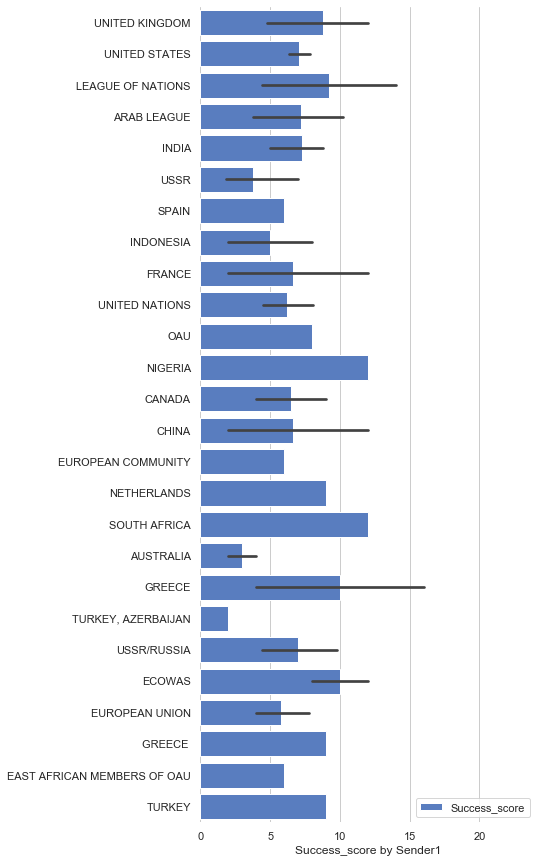

In [392]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot 
sns.set_color_codes("muted")
sns.barplot(x="Success_score", y="Sender1", data=df, label="Success_score", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="", xlabel="Success_score by Sender1")
sns.despine(left=True, bottom=True)

In [393]:
sender1_list = df['Sender1'].unique()
target_list = df['Target'].unique()

In [394]:
send_to_target = df[['Sender1', 'Sender2', 'Sender3', 'Target']]
send_to_target.head()

,Sender1,Sender2,Sender3,Target
id_case,,,,
14-1,UNITED KINGDOM,NaN,NaN,GERMANY
17-1,UNITED STATES,NaN,NaN,JAPAN
18-1,UNITED KINGDOM,NaN,NaN,RUSSIA
21-1,LEAGUE OF NATIONS,NaN,NaN,YUGOSLAVIA
25-1,LEAGUE OF NATIONS,NaN,NaN,GREECE


In [395]:
# sanctions = send_to_target.pivot("Sender1", "Target", "")
# ax = sns.heatmap(flights)

In [396]:
send_to_target['Sender2'] = send_to_target['Sender2'].fillna(method='ffill')
send_to_target['Sender3'] = send_to_target['Sender3'].fillna(method='ffill')
# df['Sender2'].value_counts(dropna=False)

/Users/francois/anaconda3/envs/data-science/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/francois/anaconda3/envs/data-science/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [397]:
send_to_target.head(50)

,Sender1,Sender2,Sender3,Target
id_case,,,,
14-1,UNITED KINGDOM,NaN,NaN,GERMANY
17-1,UNITED STATES,NaN,NaN,JAPAN
18-1,UNITED KINGDOM,NaN,NaN,RUSSIA
21-1,LEAGUE OF NATIONS,NaN,NaN,YUGOSLAVIA
25-1,LEAGUE OF NATIONS,NaN,NaN,GREECE
32-1,LEAGUE OF NATIONS,NaN,NaN,"(PARAGUAY), BOLIVIA"
32-1,LEAGUE OF NATIONS,NaN,NaN,"PARAGUAY,(BOLIVIA)"
33-1,UNITED KINGDOM,NaN,NaN,USSR
35-1,LEAGUE OF NATIONS,UNITED KINGDOM,NaN,ITALY


In [407]:
# send_to_target['origin'] = [send_to_target.Sender1]


# subset = send_to_target[['Sender1', 'Sender2', 'Sender3']].values.tolist()
# .unique().tolist()


# Sélection Sender (conditions)
# send1 = send_to_target[['Sender1']] != 'NaN'
# send2 = send_to_target[['Sender2']] != 'NaN'
# send3 = send_to_target[['Sender3']] != 'NaN'

# df_description_indiv_pop_2 = df_description_indiv[pop2]

# subset = (send_to_target[send1].to_numpy())


subset = (send_to_target[['Sender1', 'Sender2', 'Sender3']].to_numpy())
# subset = subset.to_numpy()
send_to_target['origin'] = [list(x) for x in subset]

# send_to_target.origin = [list(x) for x in subset.to_numpy()]


# subset = send_to_target[['Sender1', 'Sender2', 'Sender3']]
# send_to_target['origin'] = [tuple(x) for x in subset.to_numpy()]

# subset = send_to_target[['Sender1', 'Sender2', 'Sender3']]
# send_to_target['origin'] = (send_to_target.apply(lambda x: myfunc([tuple(x) for x in subset.to_numpy()]), axis=1)) 


/Users/francois/anaconda3/envs/data-science/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [406]:
send_to_target.head()

,Sender1,Sender2,Sender3,Target
id_case,,,,
14-1,UNITED KINGDOM,NaN,NaN,GERMANY
17-1,UNITED STATES,NaN,NaN,JAPAN
18-1,UNITED KINGDOM,NaN,NaN,RUSSIA
21-1,LEAGUE OF NATIONS,NaN,NaN,YUGOSLAVIA
25-1,LEAGUE OF NATIONS,NaN,NaN,GREECE


In [403]:
type(send_to_target['origin'][0])

# send_to_target['origin']

KeyError: 'origin'

In [401]:
send_to_target['origin'] = send_to_target['origin']

KeyError: 'origin'

In [402]:
send_to_target['new_origin'] = list([send_to_target.iloc[:,0],send_to_target.iloc[:,1],send_to_target.iloc[:,2]])

ValueError: Length of values does not match length of index